In [200]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [201]:
number_of_generations = 100
size_of_population = 1000
size_of_individual = 2
    
def genetic_algo():

    #initialisation
    number_of_parents =100
    population = np.random.randint(low = (-12.0,6.0), high = (12.0,7.0), \
                                   size=(size_of_population,size_of_individual)).astype('float')

    generation_max = []
    generation_mean = []
    for j in range(number_of_generations):
        #print(j)

        #evaluation
        objective_function_output  = []
        for i in range(size_of_population):
            x1 = population[i,0] 
            x2 = population[i,1]
            objective_function = 21.5 + x1*np.sin(4*np.pi*x1) + x2*np.sin(20*np.pi*x2) 
            objective_function_output.append(objective_function)

        generation_max.append(np.max(objective_function_output))
        generation_mean.append(np.mean(objective_function_output))
        
        #selection of parents    
        sorted_population = np.argsort(-np.array(objective_function_output))
        parents = population[sorted_population[0:number_of_parents],:]

        #recombining parents 
        set1_parents = parents[np.arange(0,number_of_parents,2),:]
        set2_parents = parents[np.arange(1,number_of_parents,2),:]
        offspring = (set1_parents + set2_parents)//2

        #mutation
        random_mutation = random.uniform(low = (-2,0), high = (2,0), size = offspring.shape )
        mutated_offspring = np.round(offspring + random_mutation)
        for i in range(mutated_offspring.shape[0]):
            x1 = mutated_offspring[i,0]
            if x1 > 12:
                mutated_offspring[i,0] = 12.0
            elif x1 < -12:
                mutated_offspring[i,0] = -12.0

        #evaluation        
        mutated_offspring_objective_function_output  = []
        for i in range(mutated_offspring.shape[0]):
            x1 = mutated_offspring[i,0] 
            x2 = mutated_offspring[i,1]
            objective_function = 21.5 + x1*np.sin(4*np.pi*x1) + x2*np.sin(20*np.pi*x2) 
            mutated_offspring_objective_function_output.append(objective_function)

        #selecting new individuals  
        weakest_indices = np.argsort(objective_function_output)[0:mutated_offspring.shape[0]]
        population[weakest_indices,:] = mutated_offspring


    #optimal solution  
    objective_function_output  = []
    
    for i in range(size_of_population):
        x1 = population[i,0] 
        x2 = population[i,1]
        
        objective_function = 21.5 + x1*np.sin(4*np.pi*x1) + x2*np.sin(20*np.pi*x2) 
        objective_function_output.append(objective_function)

    optimal_solution = population[np.argmax(objective_function_output),:]
    
    return optimal_solution, generation_mean, generation_max

In [202]:
optimal_solution_runs = []
generation_mean_runs = []
generation_max_runs = []

number_of_runs = 10

for run in range(number_of_runs):
    optimal_solution, generation_mean, generation_max = genetic_algo()
    
    optimal_solution_runs.append(optimal_solution)
    generation_mean_runs.append(generation_mean)
    generation_max_runs.append(generation_max)
    
optimal_solution_runs = np.array(optimal_solution_runs)
generation_mean_runs = np.array(generation_mean_runs)
generation_max_runs = np.array(generation_max_runs)

In [203]:
optimal_solution

array([1., 6.])

In [204]:
mean_max_fitness = np.mean(generation_max_runs, axis=0)
std_max_fitness = np.std(generation_max_runs, axis=0)

In [205]:
mean_avg_fitness = np.mean(generation_max_runs, axis=0)
std_avg_fitness = np.std(generation_max_runs, axis=0)

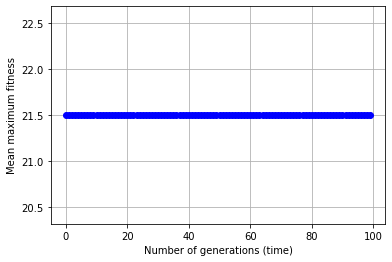

In [206]:
plt.plot(np.arange(number_of_generations), mean_max_fitness, 'bo-')
#plt.plot(np.arange(number_of_generations), mean_avg_fitness, 'ro-')
plt.grid(True)
plt.xlabel('Number of generations (time)')
plt.ylabel('Mean maximum fitness')
#plt.legend(['Mean maximum fitness', 'Mean average fitness'])
plt.show()

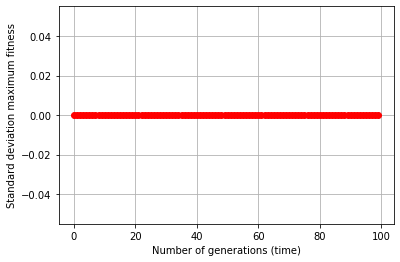

In [207]:
plt.plot(np.arange(number_of_generations), std_max_fitness, 'ro-')
#plt.plot(np.arange(number_of_generations), mean_avg_fitness, 'ro-')
plt.grid(True)
plt.xlabel('Number of generations (time)')
plt.ylabel('Standard deviation maximum fitness')
#plt.legend(['Mean maximum fitness', 'Mean average fitness'])
plt.show()

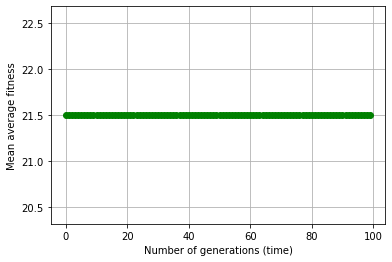

In [208]:
plt.plot(np.arange(number_of_generations), mean_avg_fitness, 'go-')
#plt.plot(np.arange(number_of_generations), mean_avg_fitness, 'ro-')
plt.grid(True)
plt.xlabel('Number of generations (time)')
plt.ylabel('Mean average fitness')
#plt.legend(['Mean maximum fitness', 'Mean average fitness'])
plt.show()

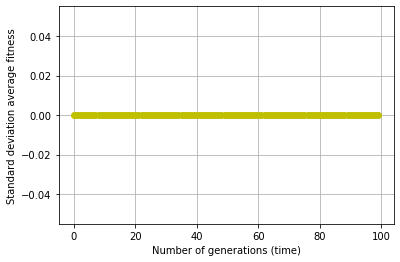

In [209]:
plt.plot(np.arange(number_of_generations), std_avg_fitness, 'yo-')
#plt.plot(np.arange(number_of_generations), mean_avg_fitness, 'ro-')
plt.grid(True)
plt.xlabel('Number of generations (time)')
plt.ylabel('Standard deviation average fitness')
#plt.legend(['Mean maximum fitness', 'Mean average fitness'])
plt.show()

In [210]:
optimal_solution_runs

array([[-1.,  6.],
       [-0.,  6.],
       [ 0.,  6.],
       [-0.,  6.],
       [-1.,  6.],
       [-1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.]])

In [211]:
generation_max_runs[:,-1]

array([21.5, 21.5, 21.5, 21.5, 21.5, 21.5, 21.5, 21.5, 21.5, 21.5])